# Basic image recognization project. 

#### I created a training model that can recognize the shape of the drawing whether it is a straight line, an arrow pointing up, or a circle. 

#### Exporting required modules. 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

I writing a function that takes a converted matrix from an RGB image file to black and white. 

Shortly it converts each RGB pixel to ones and zeros. 

The function returns two lists first one converted 2d array which is the original shape of the input values, and the second list is the converted version of the input list to one d array. I converted to one d array because the model excepts one d array only.

In [8]:
def convert_b_w(list):
    b_w_image = []
    b_w_image_one_d = []
    for row in list:
        col_list = []
        for col in row:
            if (col[0] + col[1] + col[2]) > 1.5:
                col_list.append(0)
                b_w_image_one_d.append(0)
            else:
                col_list.append(1)
                b_w_image_one_d.append(1)

        b_w_image.append(col_list)
    return b_w_image, b_w_image_one_d


**To train the model I drew 100 starting lines, 100 arrows, and 100 circles on paint, and named them according to the shape and index of the file.**

###  Some part of the training data folder is shown below. 

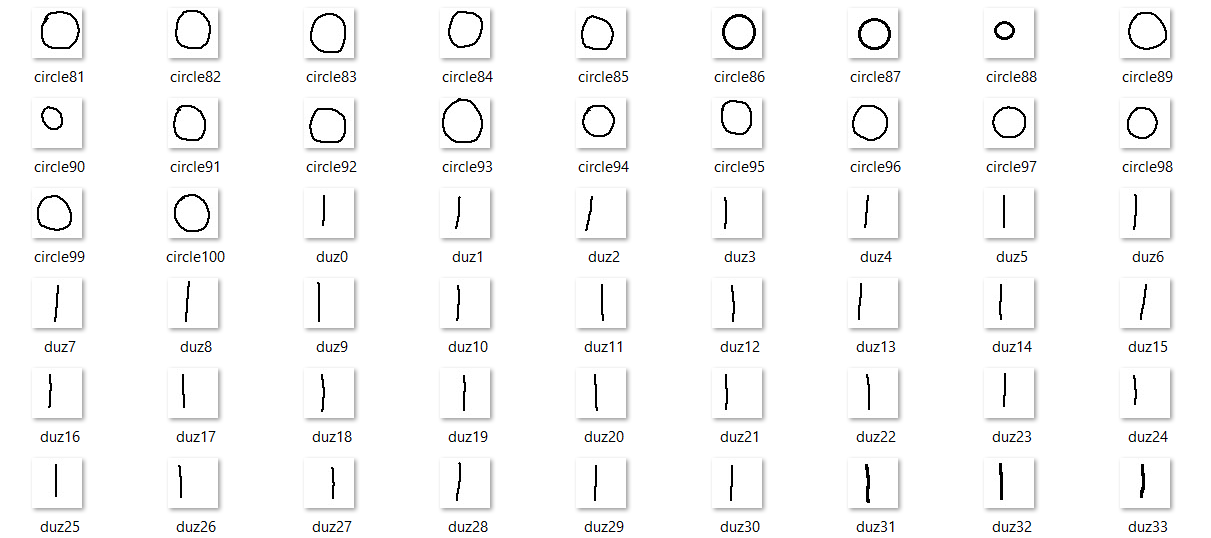

This part of the code is written to read the PNG files inside the foto folder, convert black and white by using the function above, and append them to the input list and target list.

In [9]:

inputs = []
targets = []
for target in ["duz", "ok", "circle"]:
    for i in range(101):
        img = plt.imread(f"./foto/{target}{i}.png")
        inputs.append(convert_b_w(img)[1])
        targets.append(["duz", "ok", "circle"].index(target))


### Shuffling the input  values and target values.

In [10]:
shuffled_indices = np.arange(len(inputs))
np.random.shuffle(shuffled_indices)

shuffled_inputs = []
shuffled_targets = []

for i in shuffled_indices:
    shuffled_inputs.append(inputs[i])
    shuffled_targets.append(targets[i])



### Creating the model with 3 hidden layer and with size of 300 neuron. 

In [11]:
hidden_layer_size = 300

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])




## Finnaly training the data. 

In [13]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(shuffled_inputs[:250], shuffled_targets[:250], epochs=5, validation_data=(shuffled_inputs[250:], shuffled_targets[250:]), verbose=2)

Epoch 1/5
8/8 - 1s - loss: 0.7550 - accuracy: 0.6360 - val_loss: 0.4900 - val_accuracy: 0.8679 - 1s/epoch - 153ms/step
Epoch 2/5
8/8 - 0s - loss: 0.2286 - accuracy: 0.9400 - val_loss: 0.2277 - val_accuracy: 0.9623 - 74ms/epoch - 9ms/step
Epoch 3/5
8/8 - 0s - loss: 0.0498 - accuracy: 0.9920 - val_loss: 0.1598 - val_accuracy: 0.9245 - 78ms/epoch - 10ms/step
Epoch 4/5
8/8 - 0s - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.1338 - val_accuracy: 0.9623 - 83ms/epoch - 10ms/step
Epoch 5/5
8/8 - 0s - loss: 0.0053 - accuracy: 0.9960 - val_loss: 0.1233 - val_accuracy: 0.9811 - 85ms/epoch - 11ms/step


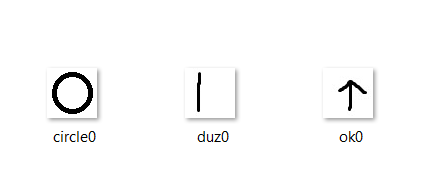

At the end, the trained model is tested in three text files inside the folder named example.

For the model 0 index shows a straight line, the 1 index shows arrow and the 2 index shows a circle.

In [14]:
#------------------- Testing The Model -------------------#

test_img = plt.imread("./example/ok0.png")

test_list = [convert_b_w(plt.imread("./example/duz0.png"))[1],
            convert_b_w(plt.imread("./example/ok0.png"))[1],
            convert_b_w(plt.imread("./example/circle0.png"))[1]]

model.predict(test_list)

1/1 [==============================] - 0s 69ms/step


array([[9.9894470e-01, 3.2143714e-04, 7.3388941e-04],
       [3.5150996e-01, 5.4597872e-01, 1.0251128e-01],
       [8.6245030e-12, 6.4653151e-14, 1.0000000e+00]], dtype=float32)